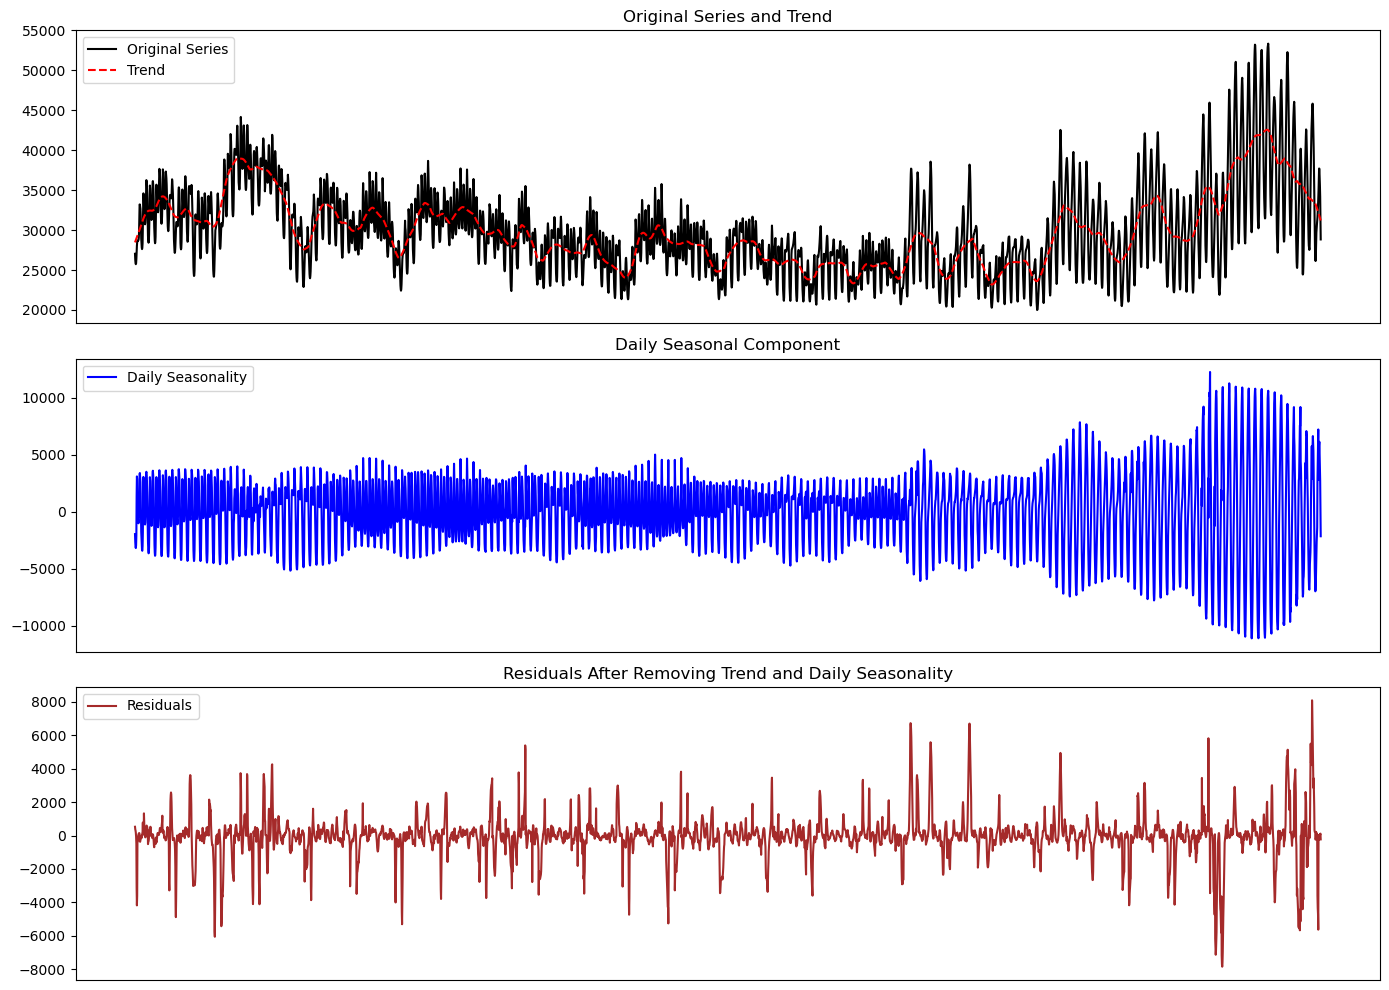

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Load the data specifying the date format directly in the read_csv function
data = pd.read_csv(
    '/Users/victormpreciado/Box Sync/TEACHING/ML4TS/Module1/Code/midatl_forecast_load_mw_hourly_averaged_integer.csv',
    parse_dates=[['date', 'hour']],
    date_format='%Y-%m-%d %H:%M:%S'  # Ensure this format matches your actual date-time format
)

# Set the index to the combined datetime column
data.set_index('date_hour', inplace=True)

# Extract the time series of forecast load
series = data['forecast_load_mw']

# Decompose the series with daily seasonality
stl = STL(series, period=24, robust=True)
result = stl.fit()

# Extract trend, daily seasonal component, and residuals
trend = result.trend
seasonal_daily = result.seasonal
residuals = result.resid

# Plot the original series, trend, daily seasonal component, and residuals
fig, axs = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

# Plot the original series and trend
axs[0].plot(series, label='Original Series', color='black')
axs[0].plot(trend, label='Trend', linestyle='--', color='red')
axs[0].set_title('Original Series and Trend')
axs[0].legend()
axs[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Plot the daily seasonal component
axs[1].plot(seasonal_daily, label='Daily Seasonality', color='blue')
axs[1].set_title('Daily Seasonal Component')
axs[1].legend()
axs[1].tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Plot the residuals
axs[2].plot(residuals, label='Residuals', color='brown')
axs[2].set_title('Residuals After Removing Trend and Daily Seasonality')
axs[2].legend()
axs[2].tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Adjust layout
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

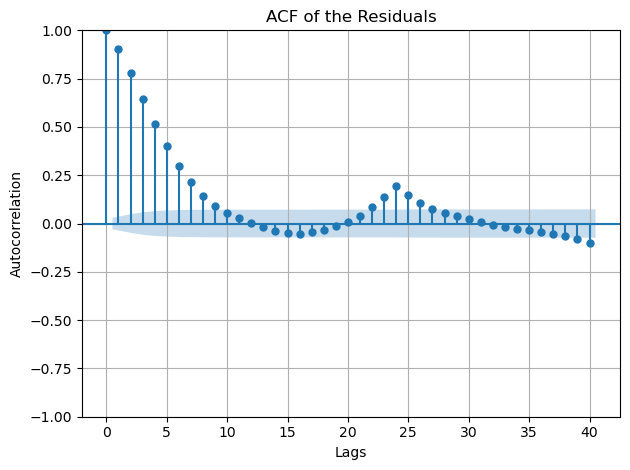

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Plot the ACF of the residuals
plt.figure(figsize=(10, 5))
plot_acf(residuals, lags=40, alpha=0.05)
plt.title('ACF of the Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.tight_layout()
plt.show()

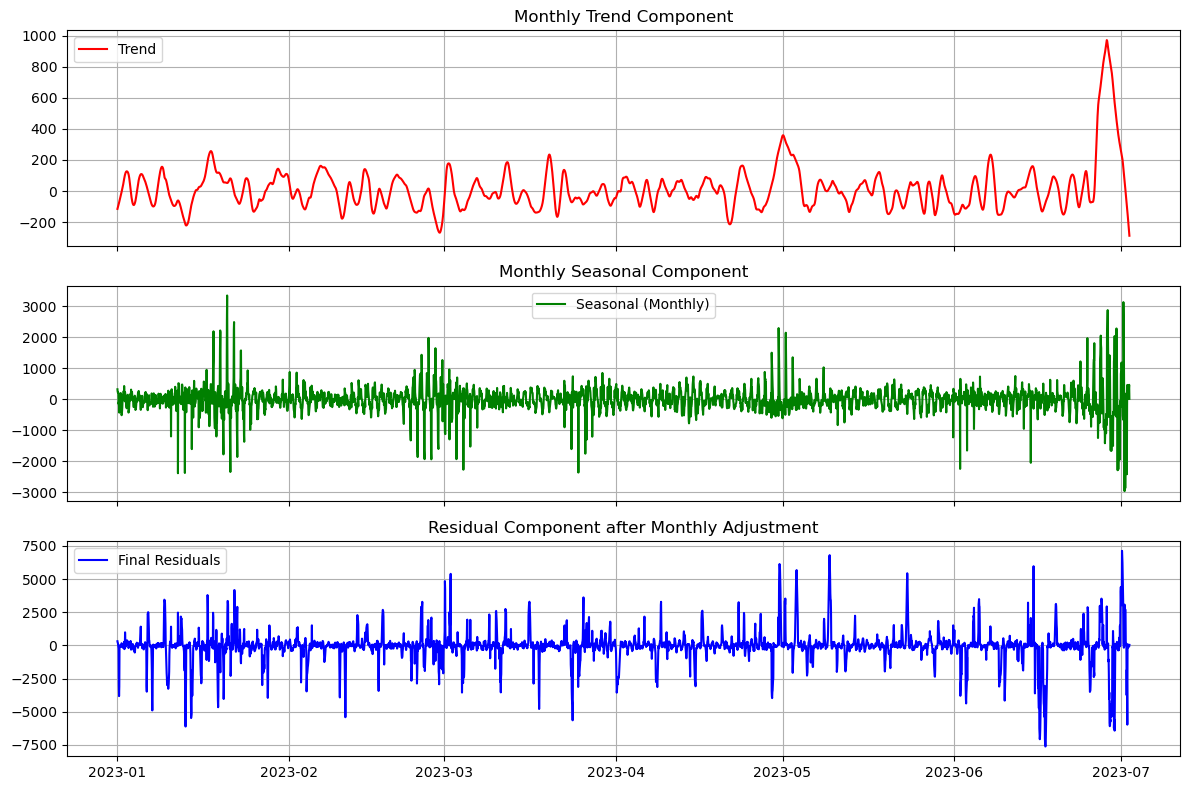

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Assuming 'residuals' is the result of the first decomposition
# and contains the residual signal after removing the daily seasonality

# Ensure your residuals have a proper datetime index if not already set
residuals.index = pd.date_range(start='2023-01-01', periods=len(residuals), freq='H')  # Adjust as needed

# Perform STL decomposition focusing on the monthly periodicity (T=30)
stl_monthly = STL(residuals, period=30, robust=True)
result_monthly = stl_monthly.fit()

# Extract the components
trend_monthly = result_monthly.trend
seasonal_monthly = result_monthly.seasonal
residuals_final = result_monthly.resid

# Plot the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot trend component
ax1.plot(trend_monthly, label='Trend', color='red')
ax1.set_title('Monthly Trend Component')
ax1.legend()
ax1.grid(True)

# Plot seasonal component
ax2.plot(seasonal_monthly, label='Seasonal (Monthly)', color='green')
ax2.set_title('Monthly Seasonal Component')
ax2.legend()
ax2.grid(True)

# Plot residuals
ax3.plot(residuals_final, label='Final Residuals', color='blue')
ax3.set_title('Residual Component after Monthly Adjustment')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()

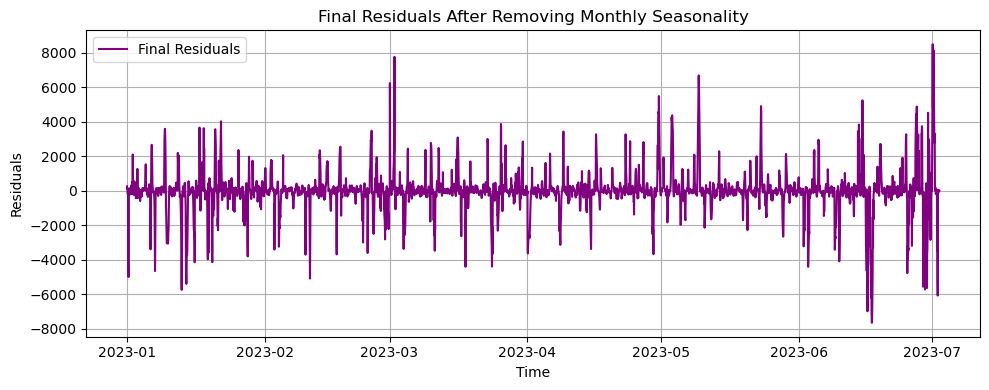

<Figure size 800x500 with 0 Axes>

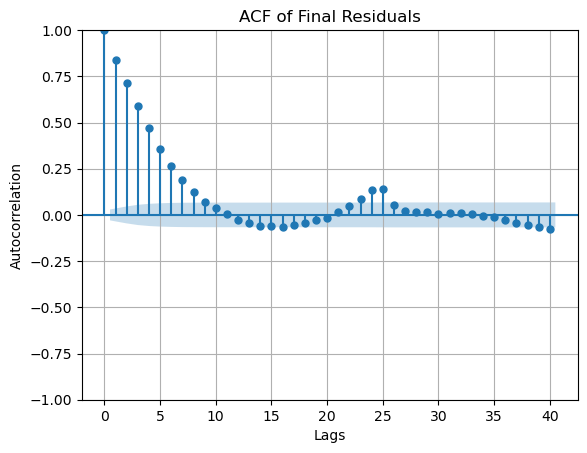

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf

# Assuming 'residuals' is the initial residuals from the first STL decomposition
# Perform STL decomposition on the residuals with T=30 for monthly seasonality
stl = STL(residuals, period=25, robust=True)
result = stl.fit()

# Extract the final residuals after removing the monthly seasonality
residuals_final = result.resid

# Plot the final residuals
plt.figure(figsize=(10, 4))
plt.plot(residuals_final, color='purple', label='Final Residuals')
plt.title('Final Residuals After Removing Monthly Seasonality')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the ACF of the final residuals to check for remaining autocorrelation
plt.figure(figsize=(8, 5))
plot_acf(residuals_final, lags=40, alpha=0.05)
plt.title('ACF of Final Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()